In [1]:
# instalación de librerias y/o modulos

## Scipy
### Bajo pip -- python -m pip install scipy
### Bajo Conda -- conda install scipy

## sqlalchemy
### Bajo pip -- pip install SQLAlchemy
###             pip install sqlalchemy-utils
### Bajo Conda conda install -c anaconda sqlalchemy
###            conda install -c conda-forge sqlalchemy-utils


In [2]:

# Importaciones
import pandas as pd
import numpy as np
import scipy.stats as stats
from sqlalchemy import create_engine
import funciones as fx
from pandas import ExcelWriter
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msngo

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

from lazypredict.Supervised import LazyRegressor
from pygam import LinearGAM, s
from sklearn.preprocessing import StandardScaler


sns.set(rc = {'figure.figsize':(20,12)})

c:\Users\esanchez\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
# Conexión a BD PostgreSQL
conn = fx.conexion_sqlalchemy()

In [4]:
# Creación de dataset de entrenamiento, testeo y EDA mediante función, la cual se conecta a BD PostgreSQL
df_train = fx.selectViewTrain(conn)
df_test = fx.selectViewTest(conn)
#df_complete = fx.selectViewComplete(conn)

In [5]:
df_train.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE1F52DE012636,2013,10888,19606,Long Island City,8923,NY,41,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1
1,2,19VDE1F71EE003817,2014,10999,39922,Windsor,10156,CO,8,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1
2,3,19UDE2F32GA001284,2016,14799,22142,Lindon,8893,UT,52,Acura,...,1229,4,gasoline,6,2359.74,144.00,4,8,generalista,1
3,4,JH4CU2F83CC019895,2012,7989,105246,Miami,9057,FL,13,Acura,...,2394,4,gasoline,6,2359.74,144.00,4,5,generalista,1
4,5,JH4CU2F64DC006203,2013,13995,32384,West Jordan,10092,UT,52,Acura,...,2393,4,gasoline,6,2359.74,144.00,4,5,generalista,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618256 entries, 0 to 618255
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       618256 non-null  int64  
 1   Vin                      618256 non-null  object 
 2   Year                     618256 non-null  int64  
 3   Price                    618256 non-null  int64  
 4   Mileage                  618256 non-null  int64  
 5   City                     618256 non-null  object 
 6   City_Id                  618256 non-null  int64  
 7   State                    618256 non-null  object 
 8   State_Id                 618256 non-null  int64  
 9   Make                     618256 non-null  object 
 10  Make_Id                  618256 non-null  int64  
 11  Model                    618256 non-null  object 
 12  Model_Id                 618256 non-null  int64  
 13  Doors                    618256 non-null  int64  
 14  Fuel

In [7]:
df_test.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE2E53EE000083,2014,8995,35725,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
1,2,19VDE2E52DE000025,2013,8995,48851,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
2,3,JH4CU2F84EC002686,2014,14490,34032,Greatneck,8550,NY,41,Acura,...,2397,4,gasoline,6,2359.74,144.00,4,5,generalista,1
3,4,JH4CU2F44CC003220,2012,12921,58550,Boise,7867,ID,19,Acura,...,2394,4,gasoline,6,2359.74,144.00,4,5,generalista,1
4,5,19VDE1F31EE009243,2014,14995,23454,Hackettstown,8583,NJ,38,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206042 entries, 0 to 206041
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       206042 non-null  int64  
 1   Vin                      206042 non-null  object 
 2   Year                     206042 non-null  int64  
 3   Price                    206042 non-null  int64  
 4   Mileage                  206042 non-null  int64  
 5   City                     206042 non-null  object 
 6   City_Id                  206042 non-null  int64  
 7   State                    206042 non-null  object 
 8   State_Id                 206042 non-null  int64  
 9   Make                     206042 non-null  object 
 10  Make_Id                  206042 non-null  int64  
 11  Model                    206042 non-null  object 
 12  Model_Id                 206042 non-null  int64  
 13  Doors                    206042 non-null  int64  
 14  Fuel

In [9]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_test_generalista = df_test[df_test.Gama == 'generalista']
df_test_generalista = df_test_generalista.select_dtypes(include='number')

df_test_premium1 = df_test[df_test.Gama == 'premium_1']
df_test_premium1 = df_test_premium1.select_dtypes(include='number')

df_test_premium2 = df_test[df_test.Gama == 'premium_2']
df_test_premium2 = df_test_premium2.select_dtypes(include='number')

df_test_premium3 = df_test[df_test.Gama == 'premium_3']
df_test_premium3 = df_test_premium3.select_dtypes(include='number')

df_test_premium4 = df_test[df_test.Gama == 'premium_4']
df_test_premium4 = df_test_premium4.select_dtypes(include='number')

df_test_premium5 = df_test[df_test.Gama == 'premium_5']
df_test_premium5 = df_test_premium5.select_dtypes(include='number')

df_test_premium6 = df_test[df_test.Gama == 'premium_6']
df_test_premium6 = df_test_premium6.select_dtypes(include='number')

df_test_premium7 = df_test[df_test.Gama == 'premium_7']
df_test_premium7 = df_test_premium7.select_dtypes(include='number')

df_test_premium8 = df_test[df_test.Gama == 'premium_8']
df_test_premium8 = df_test_premium8.select_dtypes(include='number')


In [10]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_train_generalista = df_train[df_train.Gama == 'generalista']
df_train_generalista = df_train_generalista.select_dtypes(include='number')

df_train_premium1 = df_train[df_train.Gama == 'premium_1']
df_train_premium1 = df_train_premium1.select_dtypes(include='number')

df_train_premium2 = df_train[df_train.Gama == 'premium_2']
df_train_premium2 = df_train_premium2.select_dtypes(include='number')

df_train_premium3 = df_train[df_train.Gama == 'premium_3']
df_train_premium3 = df_train_premium3.select_dtypes(include='number')

df_train_premium4 = df_train[df_train.Gama == 'premium_4']
df_train_premium4 = df_train_premium4.select_dtypes(include='number')

df_train_premium5 = df_train[df_train.Gama == 'premium_5']
df_train_premium5 = df_train_premium5.select_dtypes(include='number')

df_train_premium6 = df_train[df_train.Gama == 'premium_6']
df_train_premium6 = df_train_premium6.select_dtypes(include='number')

df_train_premium7 = df_train[df_train.Gama == 'premium_7']
df_train_premium7 = df_train_premium7.select_dtypes(include='number')

df_train_premium8 = df_train[df_train.Gama == 'premium_8']
df_train_premium8 = df_train_premium8.select_dtypes(include='number')

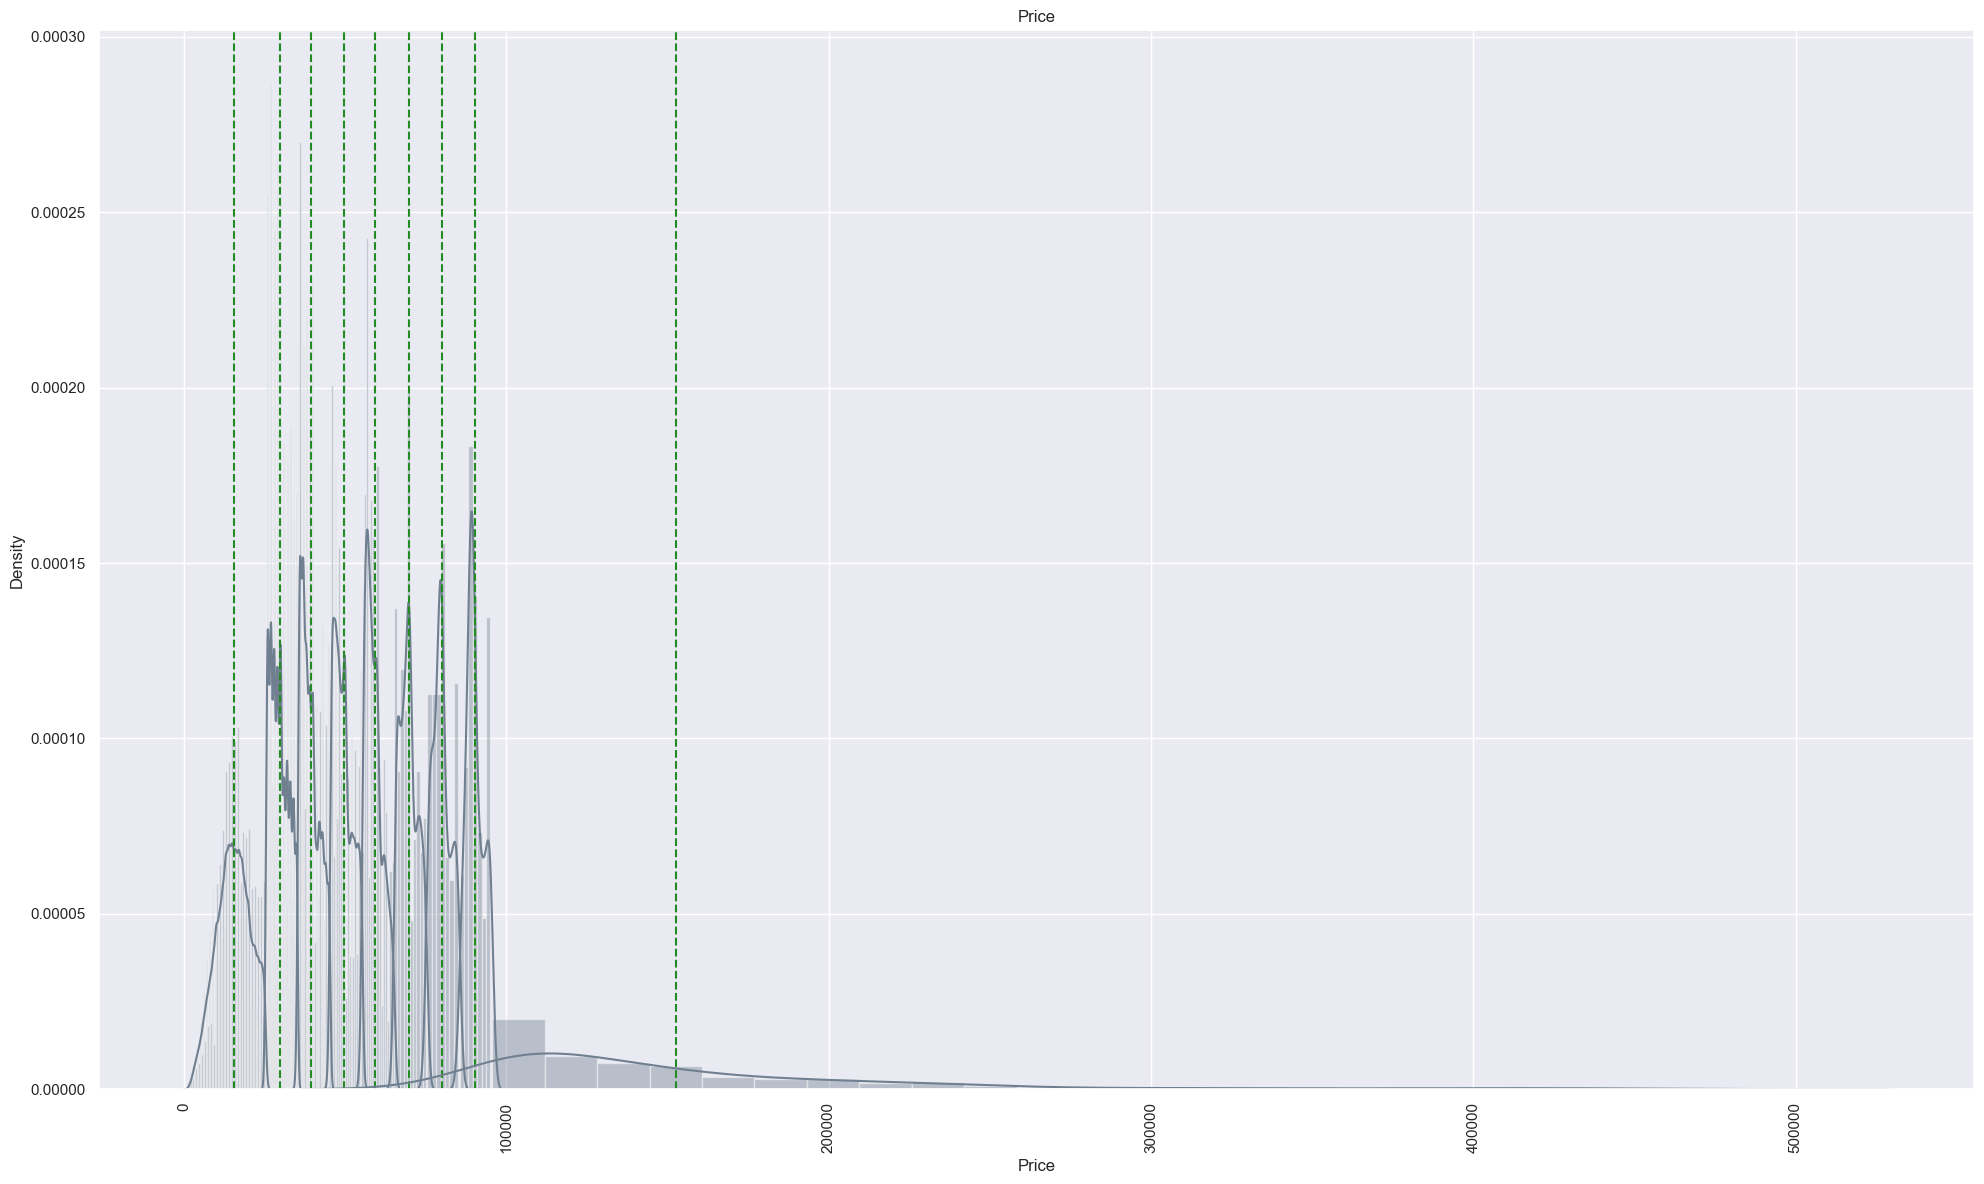

In [11]:
list_make = []
list_make = [df_test_generalista, df_test_premium1, df_test_premium2, df_test_premium3, df_test_premium4, df_test_premium5, df_test_premium6
             , df_test_premium7, df_test_premium8]

for index, value in enumerate(list_make):
    df_test_obj = value[["Price"]]
    #print(type(df_test_obj))
    fx.graph(df_test_obj)

AttributeError: 'Rectangle' object has no property 'errorbar'

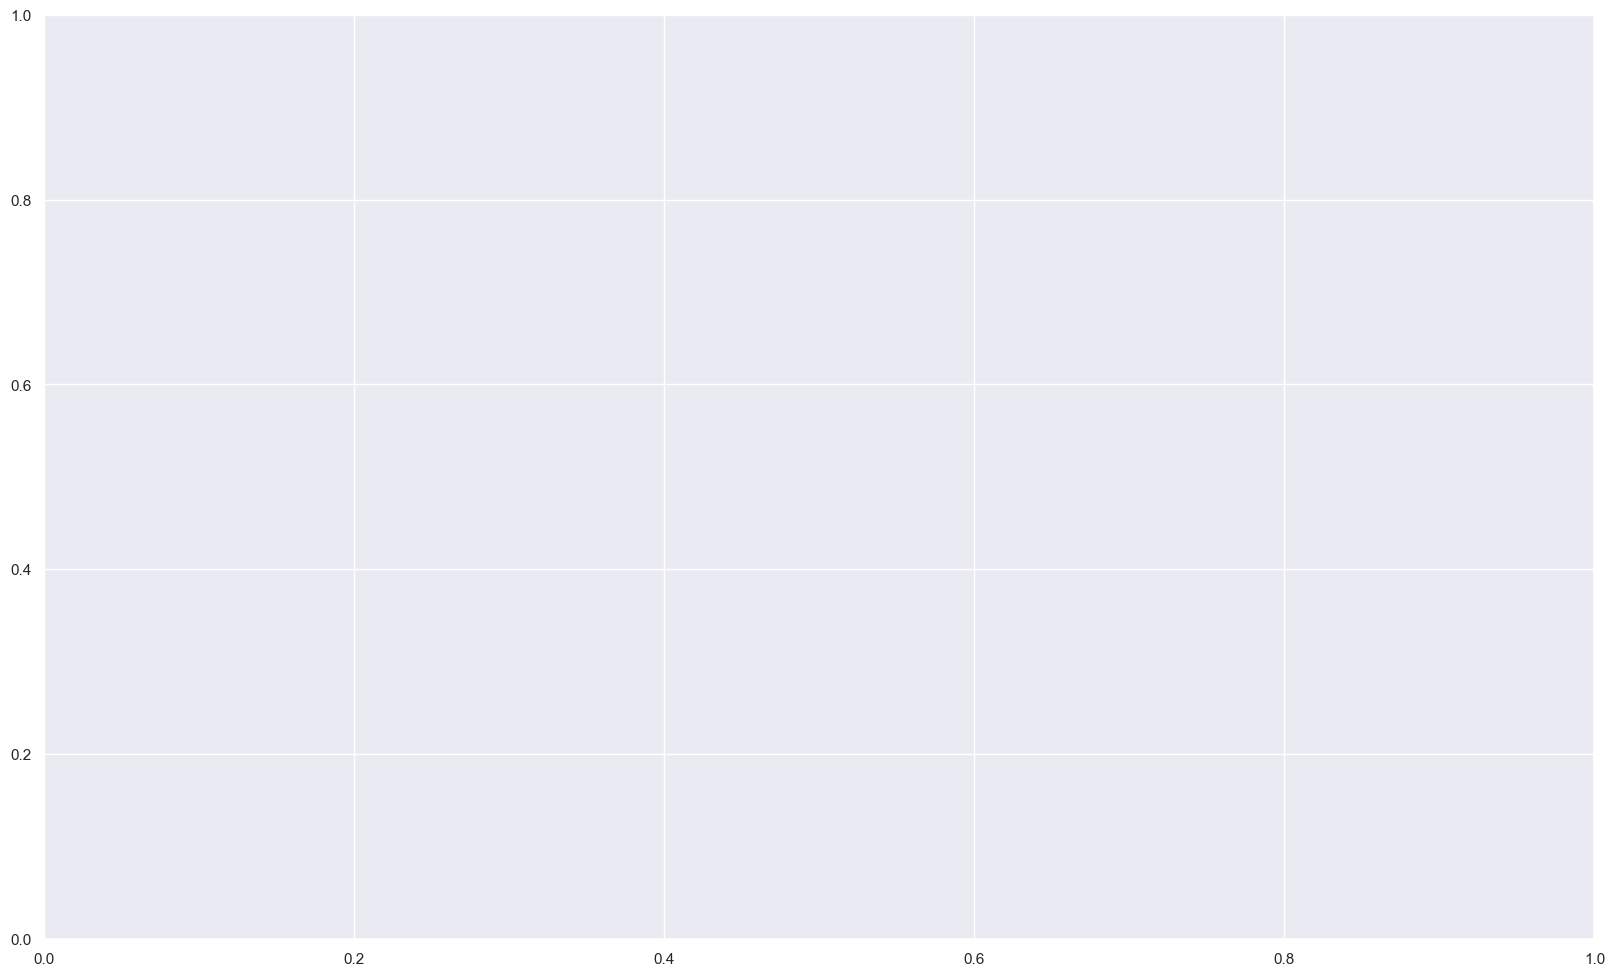

In [12]:
X = df_test.Price
Y = df_test.Make
sns.barplot(
    data=df_test, x=X, y=Y,
    errorbar=("pi", 50), capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

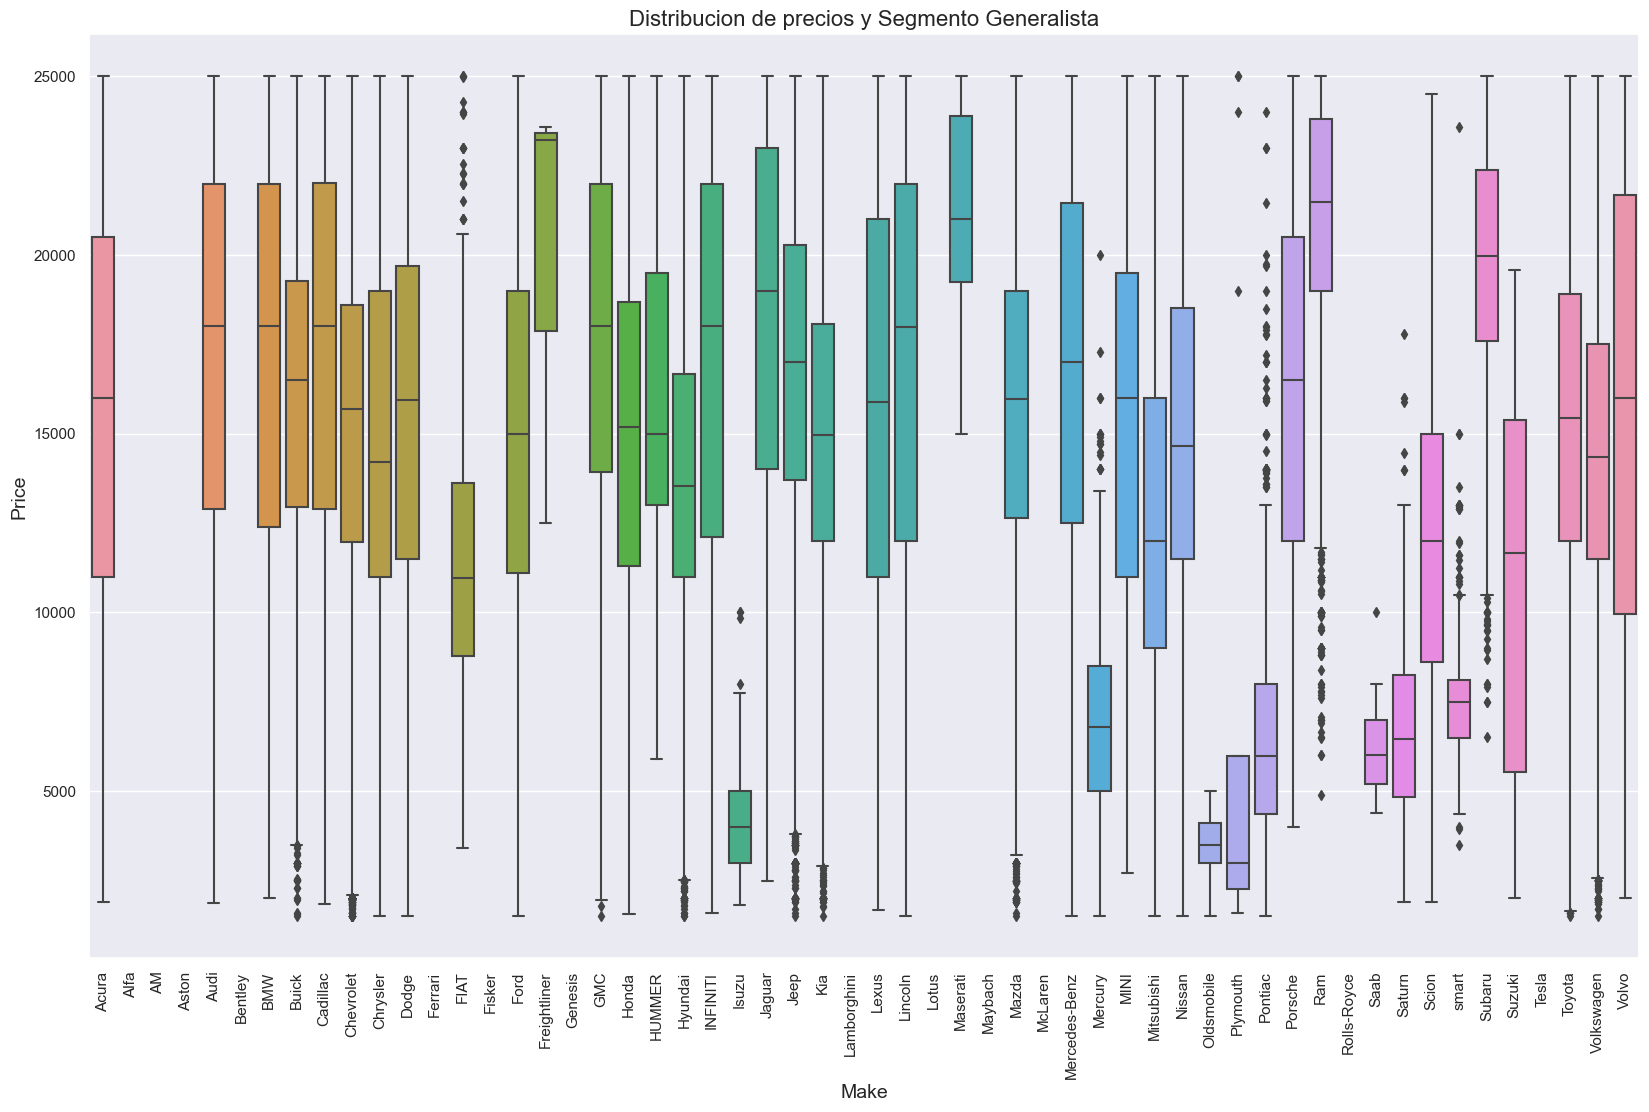

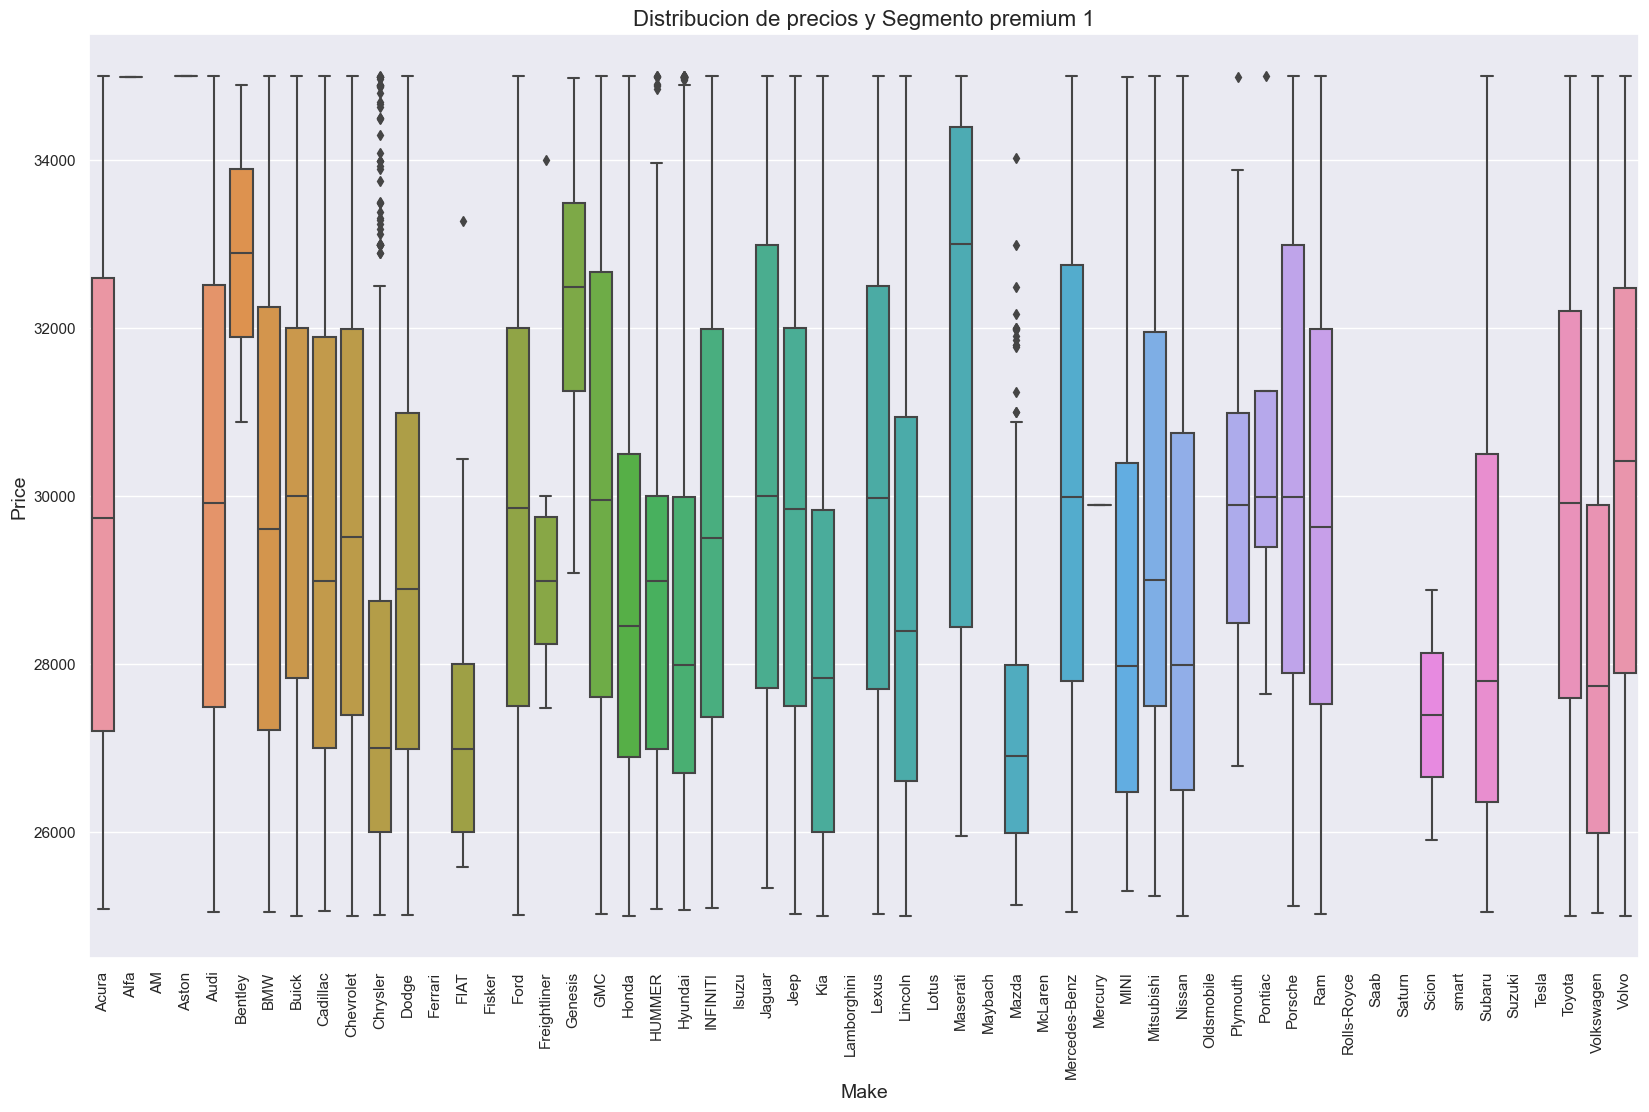

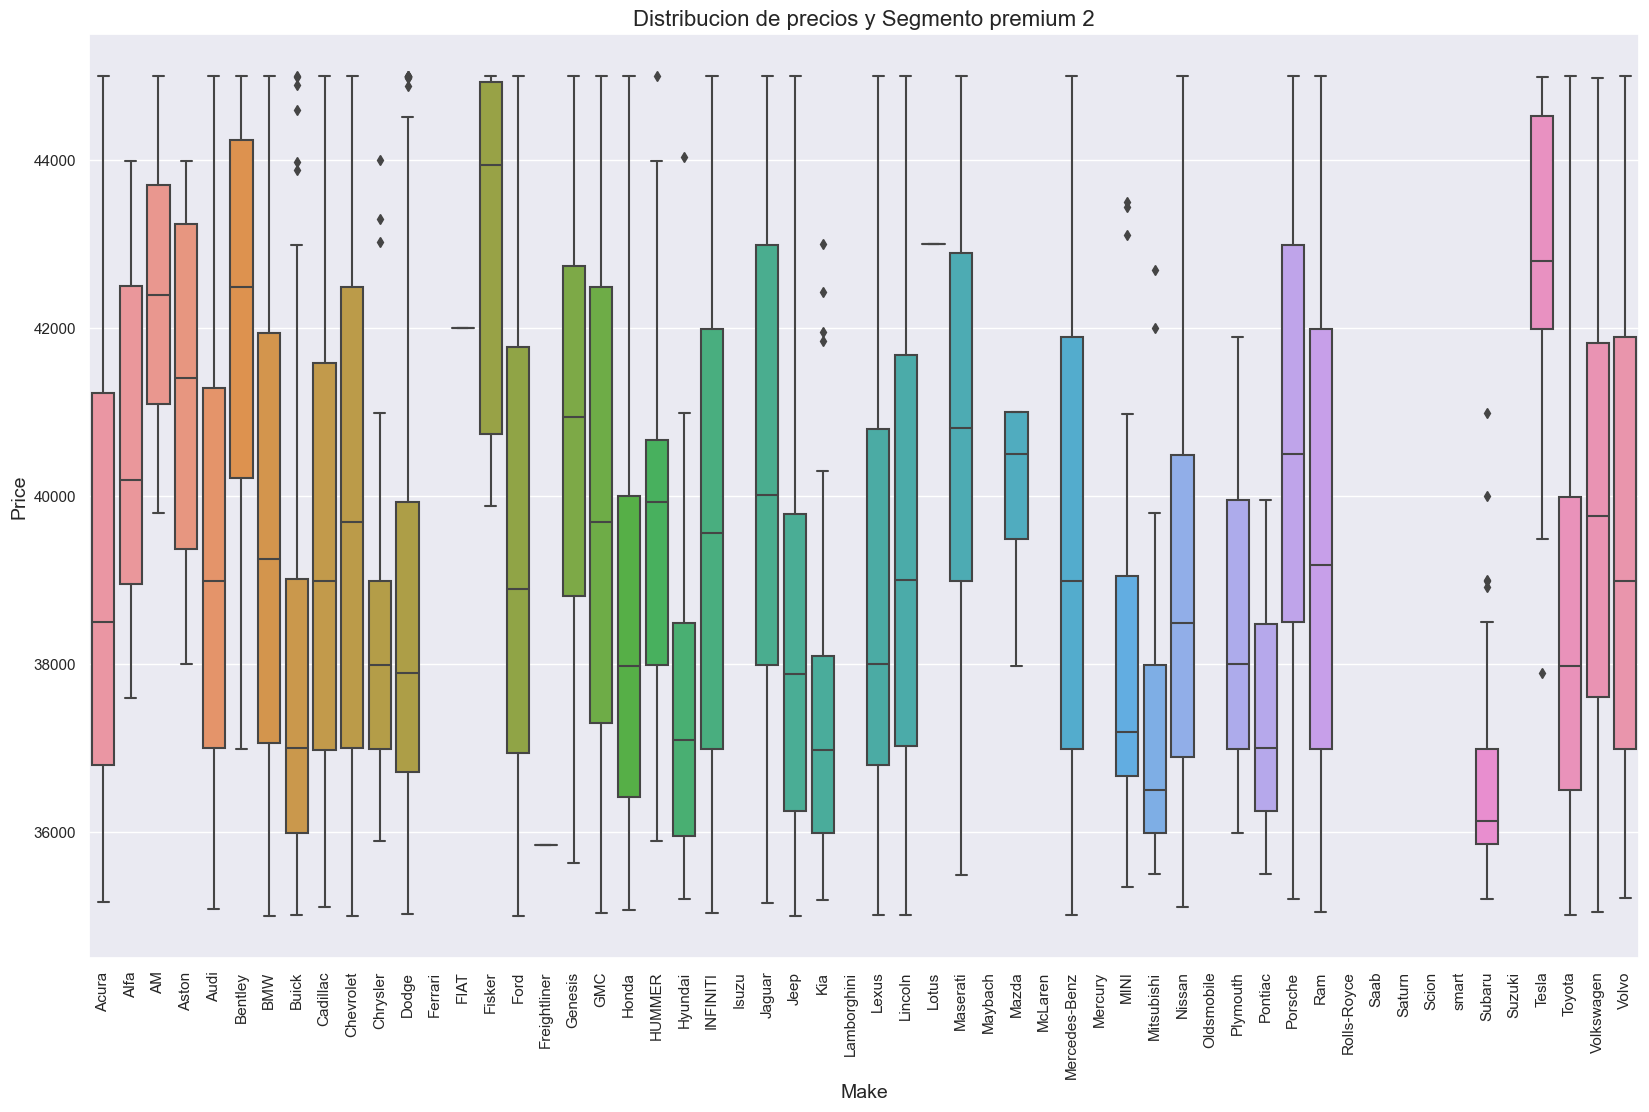

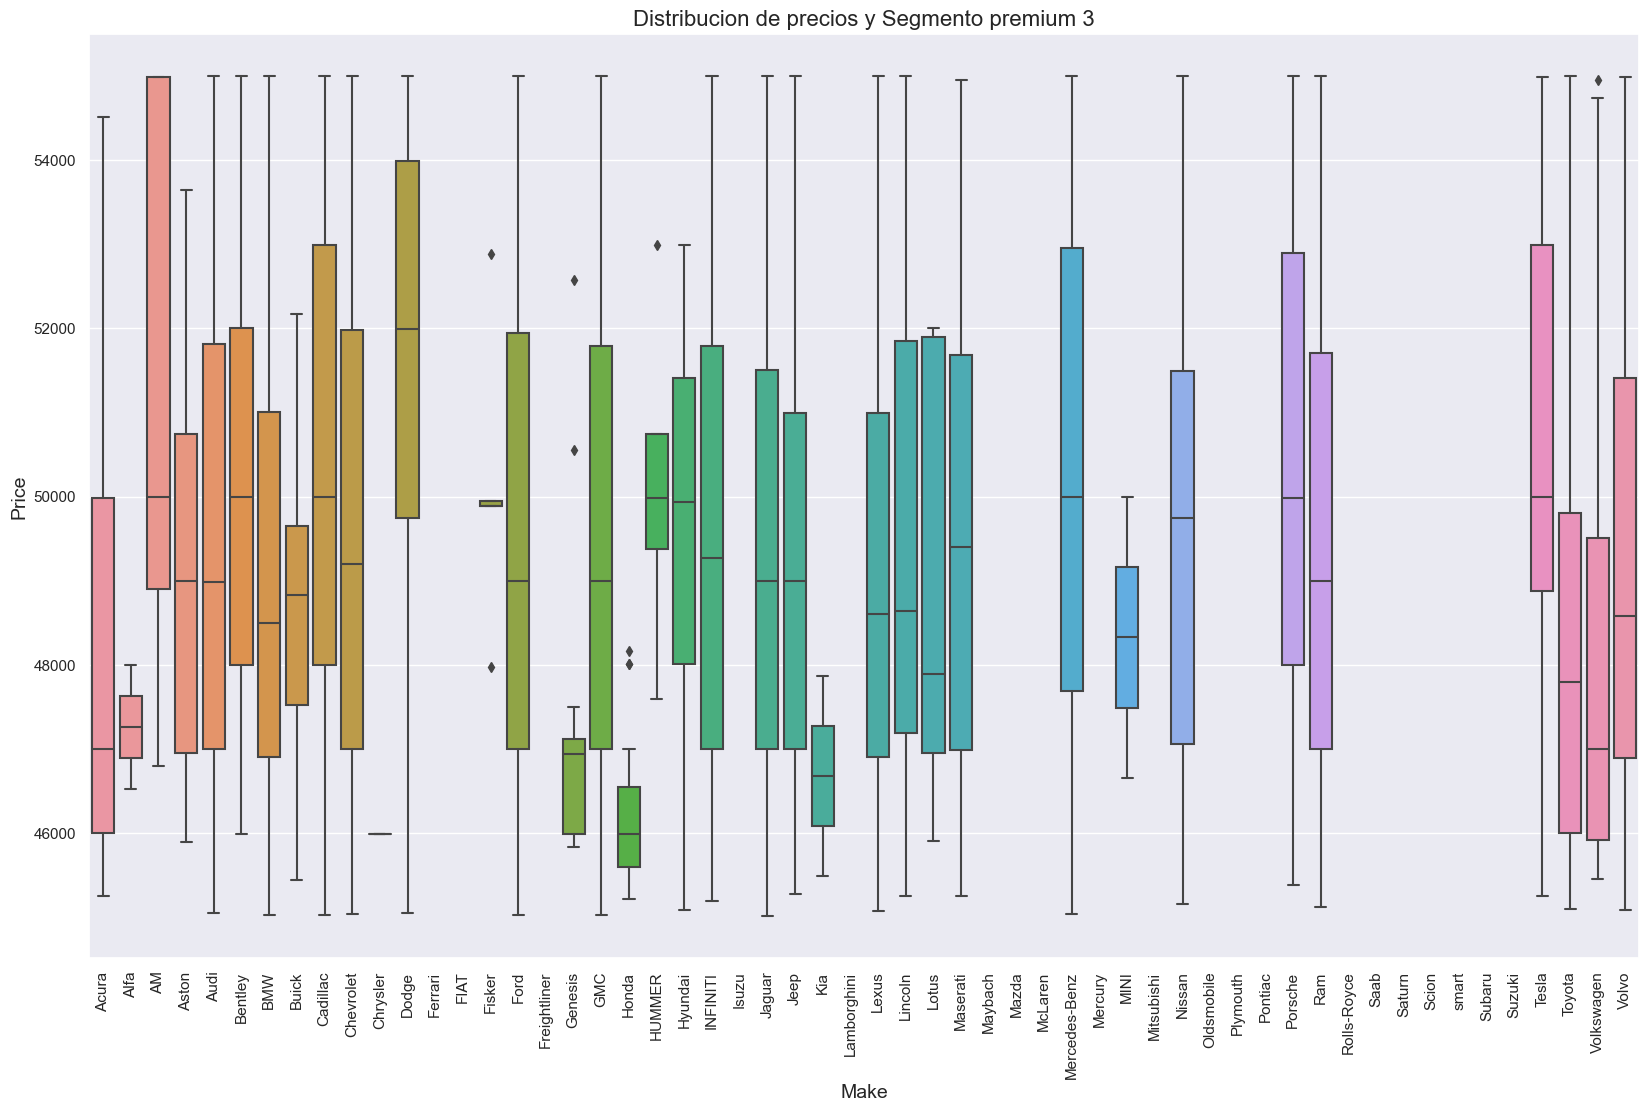

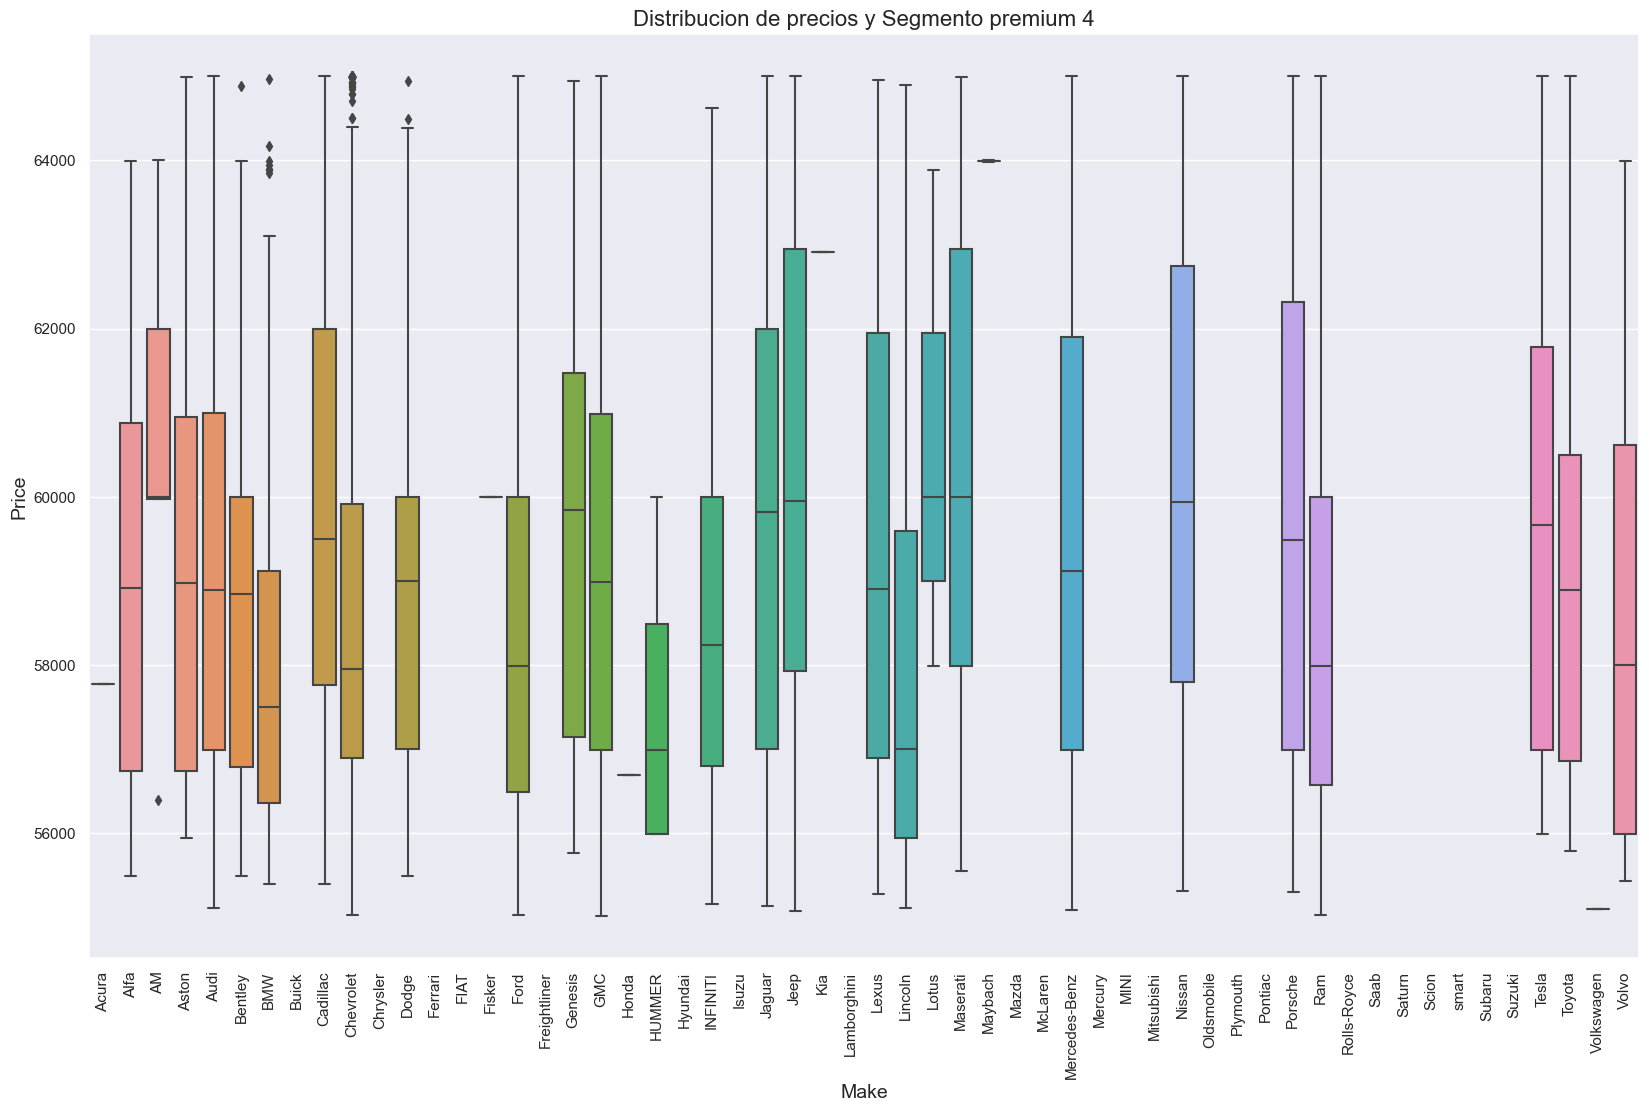

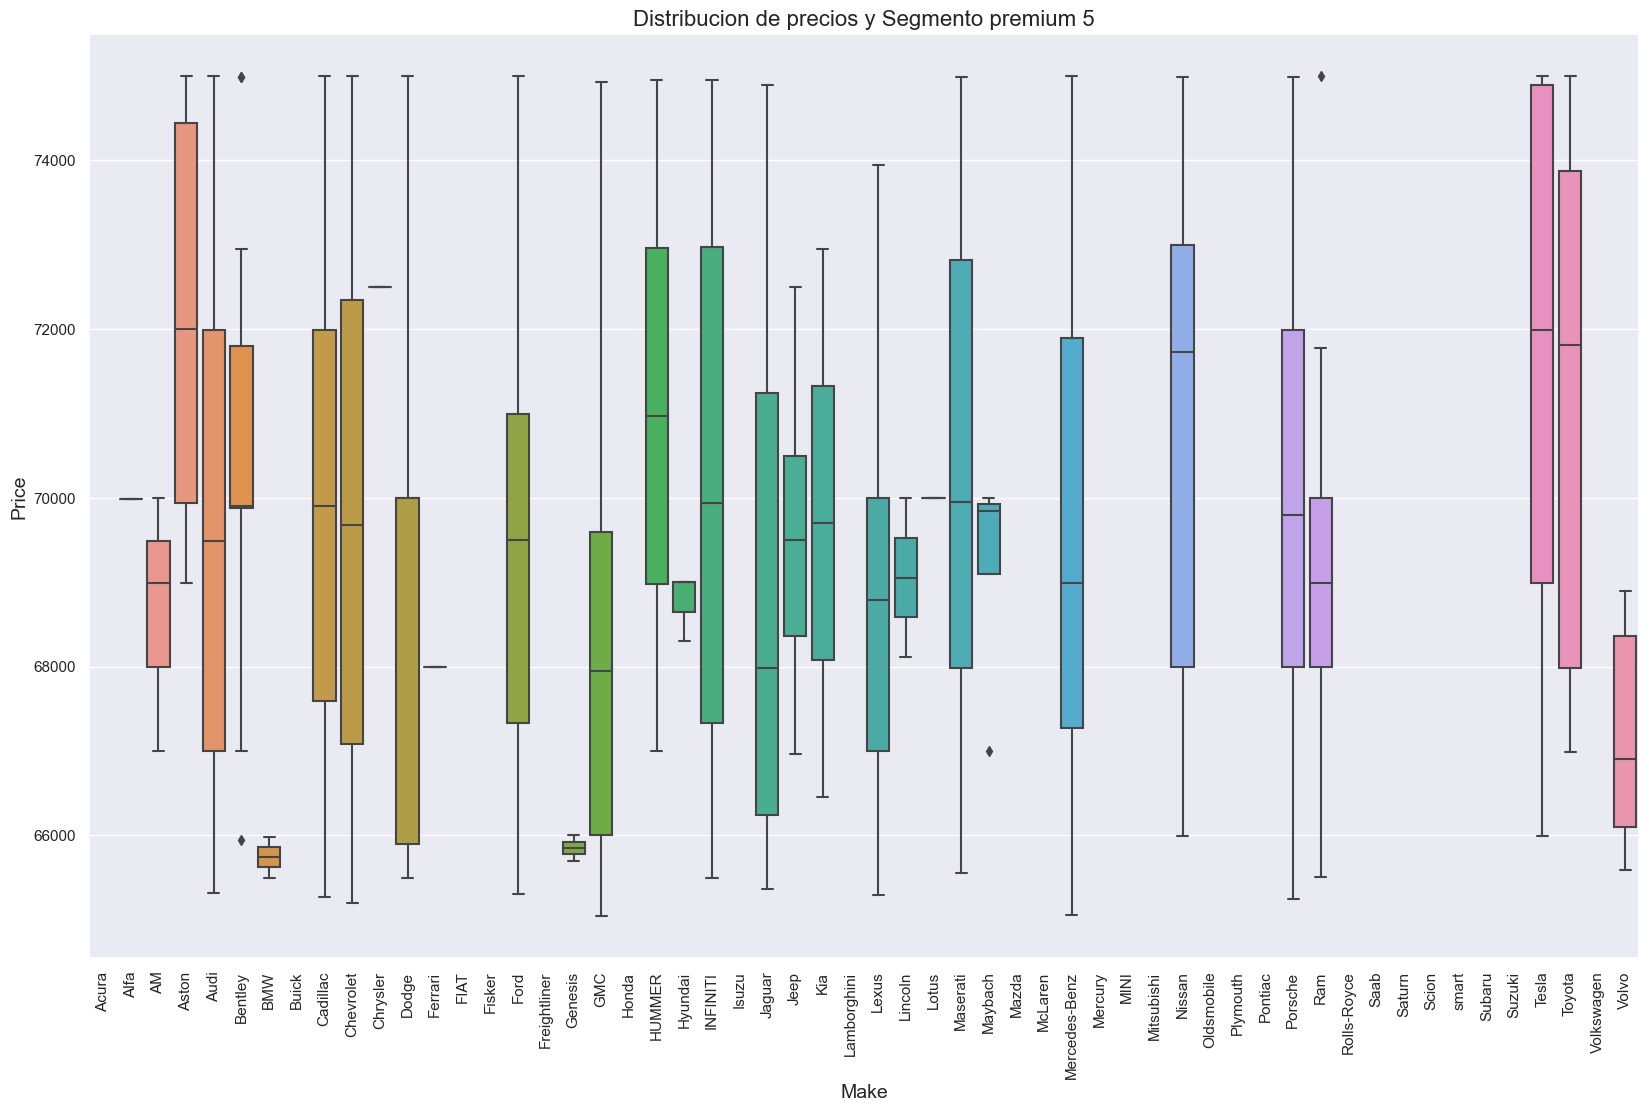

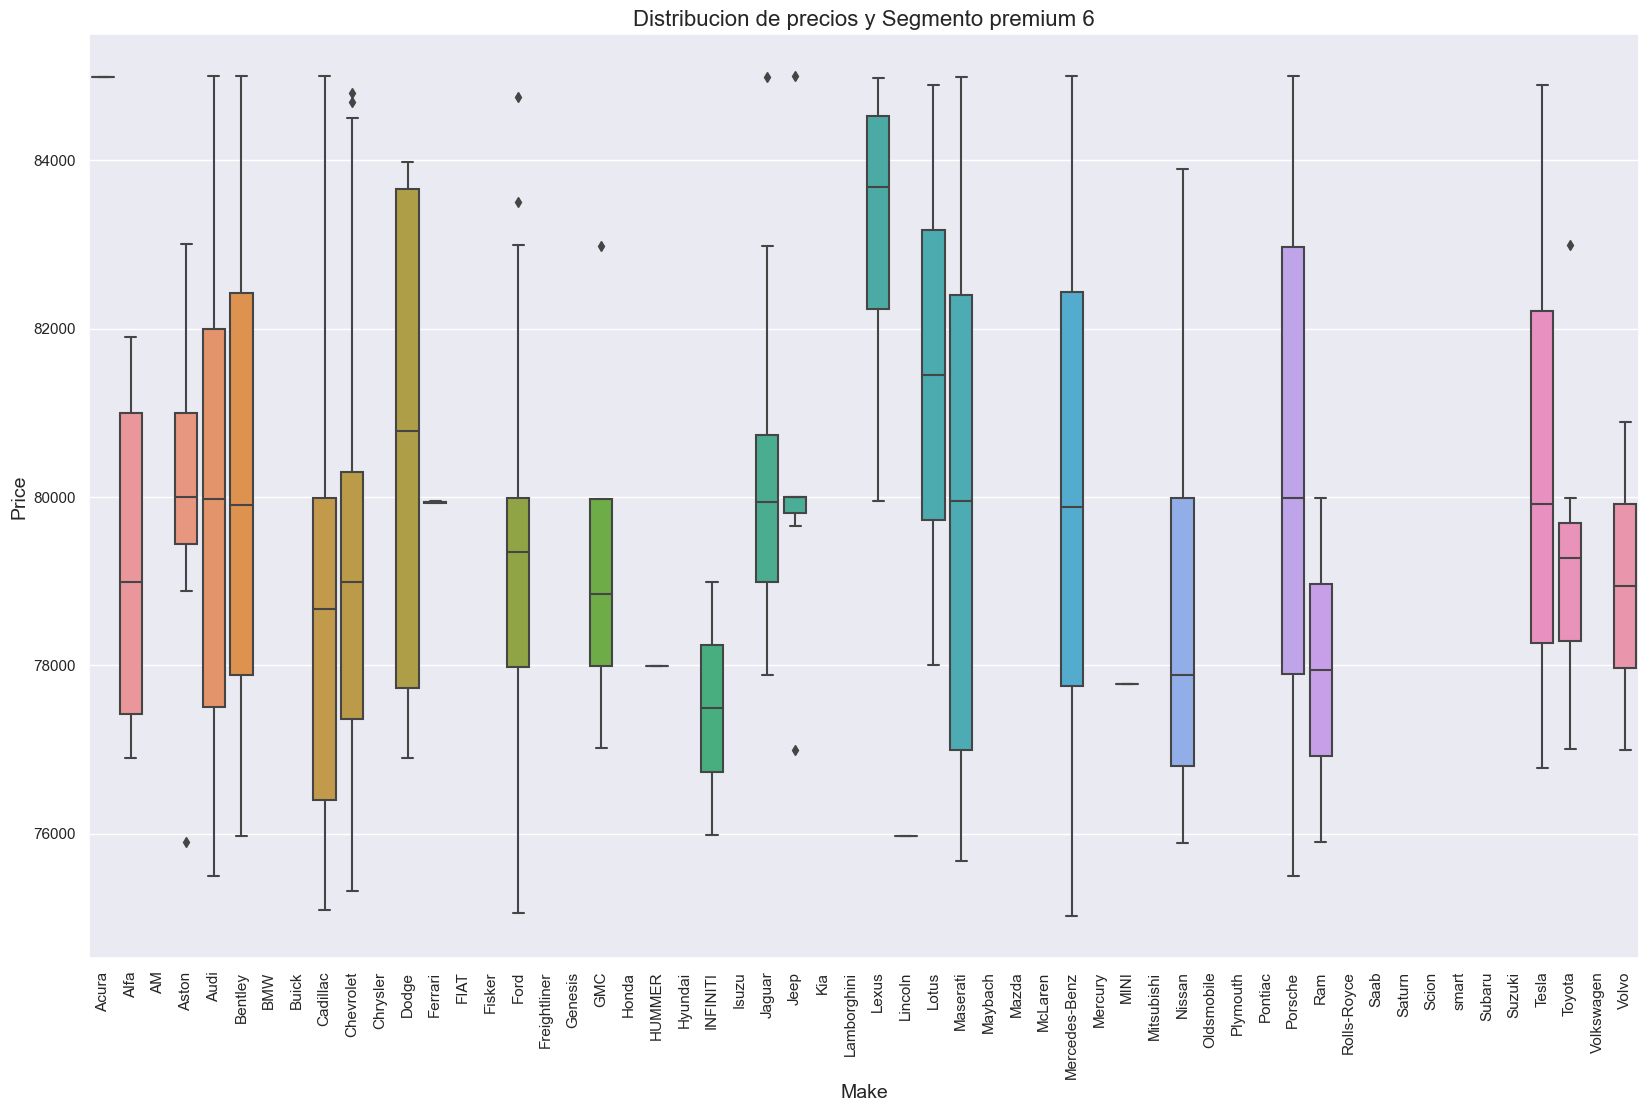

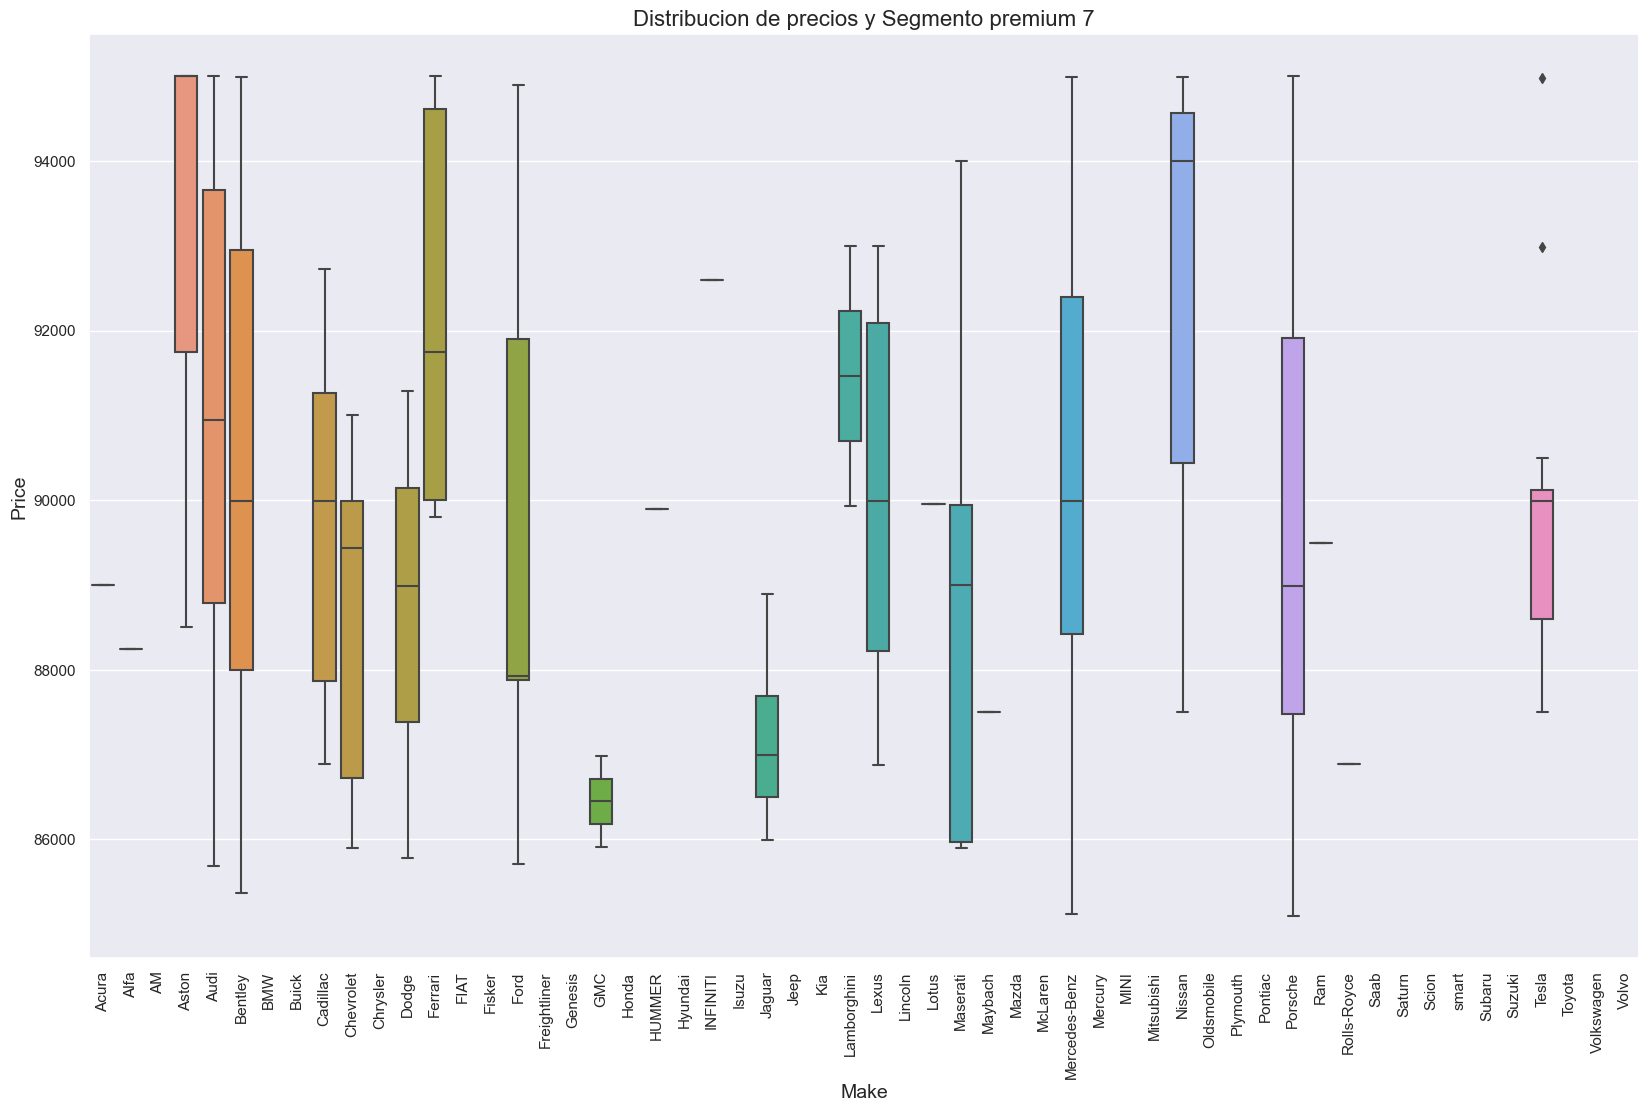

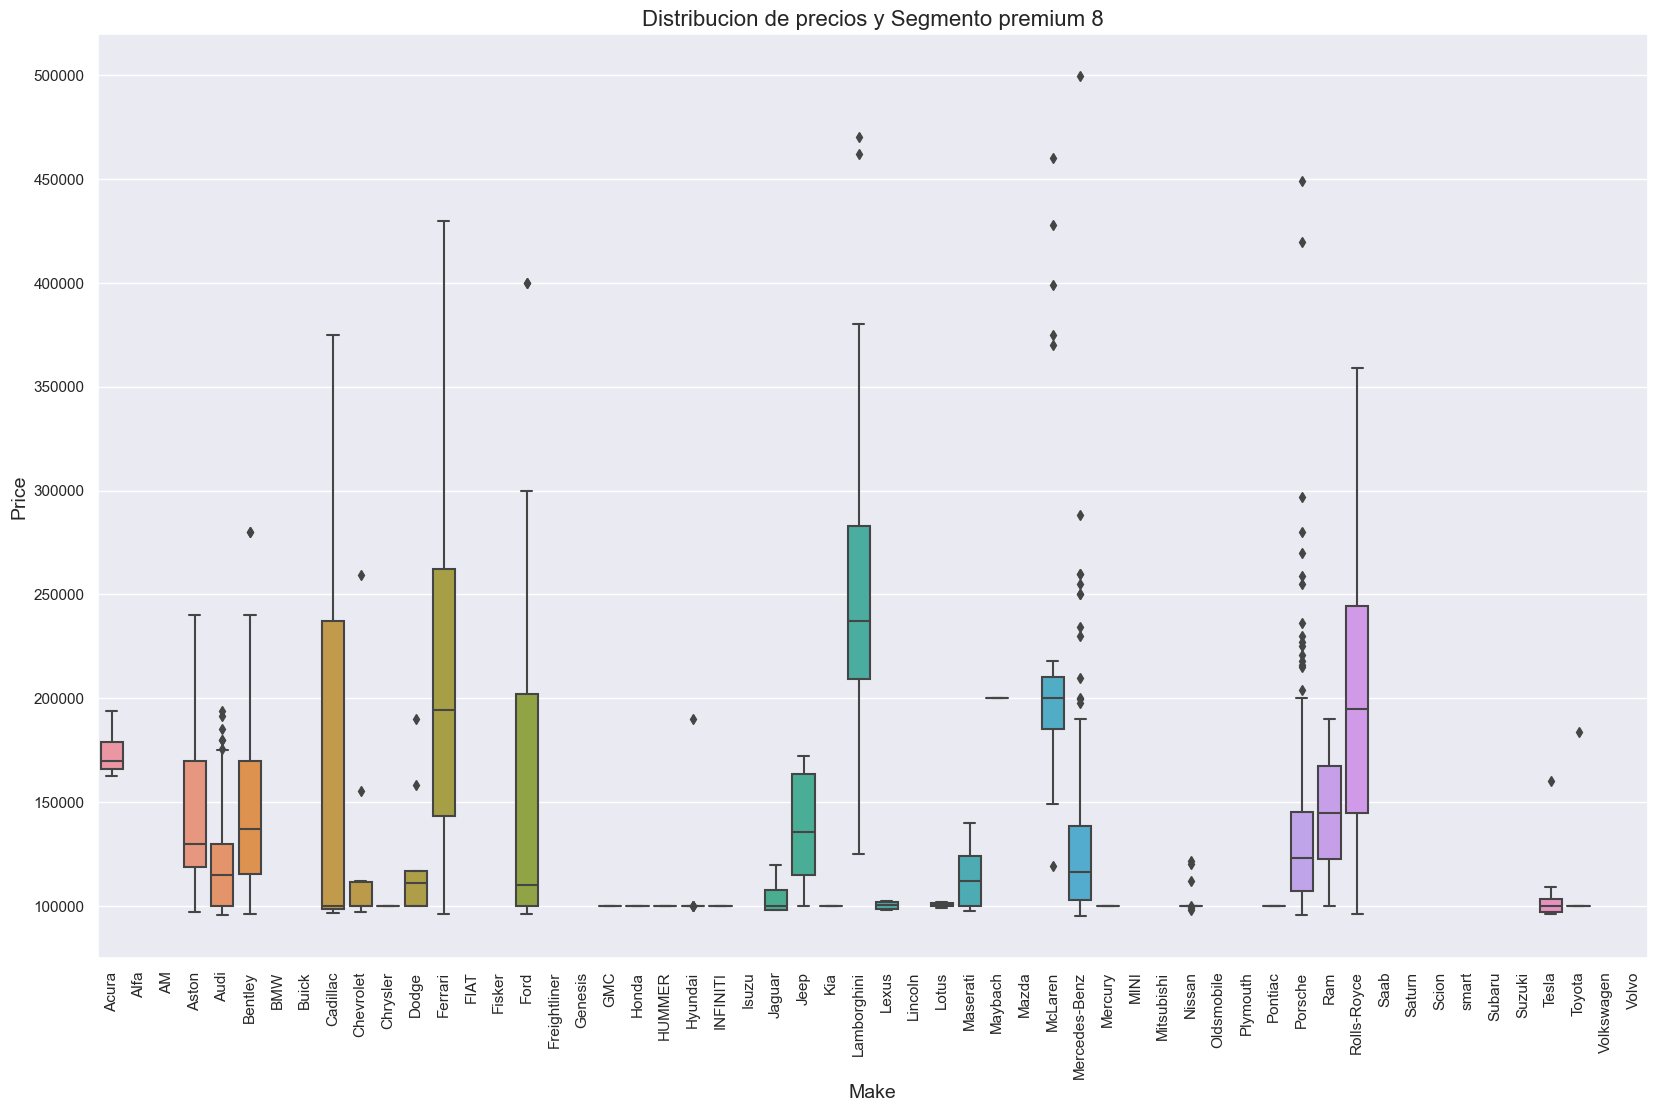

In [13]:
list_bxplot = []
list_bxplot = [df_train_generalista['Price'], df_train_premium1['Price'], df_train_premium2['Price'], df_train_premium3['Price']
               ,df_train_premium4['Price'], df_train_premium5['Price'], df_train_premium6['Price'], df_train_premium7['Price']
               ,df_train_premium8['Price']]

for index, value in enumerate(list_bxplot):
    title = ''
    if index == 0:
        title = 'Distribucion de precios y Segmento Generalista'
    else:
        title = f'Distribucion de precios y Segmento premium {index}'   

    #print(value)
    fx.boxplot_graph(df_train['Make'], value, title)

## Entrenamiento Modelos

In [14]:
list_dt = []
list_dt = [[df_train_generalista, df_test_generalista], [df_train_premium1, df_test_premium1]
           ,[df_train_premium2, df_test_premium2], [df_train_premium3, df_test_premium3]
           ,[df_train_premium4, df_test_premium4], [df_train_premium5, df_test_premium5]
           ,[df_train_premium6, df_test_premium6], [df_train_premium7, df_test_premium7]
           ,[df_train_premium8, df_test_premium8]]

#### LazyPredict => LazyRegressor

#### se aplicara LazyRegressor de la libreria LazyPredict para ayudarnos a comprender que modelos funcionan mejor sin ningun ajuste de parametros.

In [15]:
X_train_model_lazy = df_train_premium8.drop(columns = ['Price'])
y_train_model_lazy = df_train_premium8['Price']

X_test_model_lazy = df_test_premium8.drop(columns = ['Price'])
y_test_model_lazy = df_test_premium8['Price']

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_lazyRegressor, predictions = reg.fit(X_train_model_lazy, X_test_model_lazy, y_train_model_lazy, y_test_model_lazy)

100%|██████████| 42/42 [00:55<00:00,  1.33s/it]


In [16]:
models_lazyRegressor

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.43,0.45,50472.73,0.36
GradientBoostingRegressor,0.42,0.44,51105.71,0.18
RandomForestRegressor,0.41,0.43,51453.67,0.75
AdaBoostRegressor,0.39,0.41,52502.21,0.10
HistGradientBoostingRegressor,0.36,0.38,53507.28,0.84
KNeighborsRegressor,0.34,0.36,54415.90,0.03
LGBMRegressor,0.34,0.36,54511.68,0.13
BaggingRegressor,0.34,0.36,54686.07,0.08
XGBRegressor,0.21,0.23,59605.83,0.26


#### GradientBoostingRegressor

In [17]:
for index, value in enumerate(list_dt):
    title = ''
    if index == 0:
        title = 'Reporte para GradientBoostingRegressor dataset generalista'
    else:
        title = f'Reporte para GradientBoostingRegressor dataset premium {index}'    
        
    fx.report_metrics(GradientBoostingRegressor(random_state=11238), value[0], 
                  value[1], 'Price', title)
    print('=============================================================')
    print('\n')

Reporte para GradientBoostingRegressor dataset generalista
    RMSE: 3141.1884314043336
    MAE: 2012.4746159476035
    R2 Score: 0.6373257651194812


Reporte para GradientBoostingRegressor dataset premium 1
    RMSE: 3266.820773261645
    MAE: 2154.356388022057
    R2 Score: -0.33547751741999043


Reporte para GradientBoostingRegressor dataset premium 2
    RMSE: 3256.5599452807714
    MAE: 2062.097533784974
    R2 Score: -0.32099112602515234


Reporte para GradientBoostingRegressor dataset premium 3
    RMSE: 3270.747568006045
    MAE: 2137.516478577294
    R2 Score: -0.32392196087882885


Reporte para GradientBoostingRegressor dataset premium 4
    RMSE: 2808.717115271607
    MAE: 1653.8455754784954
    R2 Score: -0.10879764971321815


Reporte para GradientBoostingRegressor dataset premium 5
    RMSE: 3027.721780177051
    MAE: 2086.2094265211636
    R2 Score: -0.1839769325669014


Reporte para GradientBoostingRegressor dataset premium 6
    RMSE: 3191.0319907688026
    MAE: 2288.48

#### RandomForestRegressor

In [18]:
for index, value in enumerate(list_dt):
    title = ''
    if index == 0:
        title = 'Reporte para GradientBoostingRegressor dataset generalista'
    else:
        title = f'Reporte para GradientBoostingRegressor dataset premium {index}'    
        
    fx.report_metrics(RandomForestRegressor(random_state=11238), value[0], 
                  value[1], 'Price', title)
    print('=============================================================')
    print('\n')

#### AdaBoostRegressor

In [ ]:
for index, value in enumerate(list_dt):
    title = ''
    if index == 0:
        title = 'Reporte para GradientBoostingRegressor dataset generalista'
    else:
        title = f'Reporte para GradientBoostingRegressor dataset premium {index}'    
        
    fx.report_metrics(AdaBoostRegressor(random_state=11238), value[0], 
                  value[1], 'Price', title)
    print('=============================================================')
    print('\n')

#### DecisionTreeRegressor

In [ ]:
#max = 1000

for index, value in enumerate(list_dt):
    title = ''
    if index == 0:
        title = 'Reporte para DecisionTreeRegressor dataset generalista'
    else:
        title = f'Reporte para DecisionTreeRegressor dataset premium {index}'    
        
    fx.report_metrics(DecisionTreeRegressor(random_state=11238), value[0], 
                  value[1], 'Price', title)
    print('=============================================================')
    print('\n')

Reporte para DecisionTreeRegressor dataset generalista
    RMSE: 5430.0844127789505
    MAE: 3505.0
    R2 Score: -0.08378188252855523


Reporte para DecisionTreeRegressor dataset premium 1
    RMSE: 4488.44535494046
    MAE: 3301.0
    R2 Score: -1.5210290401625612


Reporte para DecisionTreeRegressor dataset premium 2
    RMSE: 4291.291964116746
    MAE: 2990.0
    R2 Score: -1.29381227870849


Reporte para DecisionTreeRegressor dataset premium 3
    RMSE: 4467.712663437837
    MAE: 3089.5
    R2 Score: -1.470238010818778


Reporte para DecisionTreeRegressor dataset premium 4
    RMSE: 4034.9552987458787
    MAE: 2509.0
    R2 Score: -1.2883041637161803


Reporte para DecisionTreeRegressor dataset premium 5
    RMSE: 4139.778607800919
    MAE: 2893.0
    R2 Score: -1.2134287320938277


Reporte para DecisionTreeRegressor dataset premium 6
    RMSE: 4296.721952900902
    MAE: 3322.5
    R2 Score: -1.3391321105718945


Reporte para DecisionTreeRegressor dataset premium 7
    RMSE: 4620.

#### LinearRegression

In [ ]:
for index, value in enumerate(list_dt):
    title = ''
    if index == 0:
        title = 'Reporte para LinearRegression dataset generalista'
    else:
        title = f'Reporte para LinearRegression dataset premium {index}'    
        
    fx.report_metrics(LinearRegression(), value[0], 
                  value[1], 'Price', title)
    print('=============================================================')
    print('\n')

Reporte para LinearRegression dataset generalista
    RMSE: 3448.7577854073784
    MAE: 2278.4473949142266
    R2 Score: 0.5628262140901713


Reporte para LinearRegression dataset premium 1
    RMSE: 2756.1064492583687
    MAE: 2165.249137105071
    R2 Score: 0.049443493906003


Reporte para LinearRegression dataset premium 2
    RMSE: 2793.387091094066
    MAE: 2366.837970248089
    R2 Score: 0.02804985230673418


Reporte para LinearRegression dataset premium 3
    RMSE: 2829.9765997688814
    MAE: 2392.074315180056
    R2 Score: 0.008862242643746243


Reporte para LinearRegression dataset premium 4
    RMSE: 2623.361253588976
    MAE: 1920.606749858649
    R2 Score: 0.03271936118924512


Reporte para LinearRegression dataset premium 5
    RMSE: 3036.096480870855
    MAE: 2391.491640297463
    R2 Score: -0.19053576872600875


Reporte para LinearRegression dataset premium 6
    RMSE: 2863.168100418545
    MAE: 2191.4255085105397
    R2 Score: -0.038661282007557585


Reporte para Linear

#### LassoCV

In [ ]:
for index, value in enumerate(list_dt):
    title = ''
    if index == 0:
        title = 'Reporte para LassoCV dataset generalista'
    else:
        title = f'Reporte para LassoCV dataset premium {index}'    
        
    fx.report_metrics(LassoCV(cv=3, random_state=11238), value[0], 
                  value[1], 'Price', title)
    print('=============================================================')
    print('\n')

Reporte para LassoCV dataset generalista
    RMSE: 3870.042299878543
    MAE: 2575.8492727487464
    R2 Score: 0.44949641862029865


Reporte para LassoCV dataset premium 1
    RMSE: 2756.34689581133
    MAE: 2269.385124545388
    R2 Score: 0.04927763093274462


Reporte para LassoCV dataset premium 2
    RMSE: 2817.628027776926
    MAE: 2447.4489296098473
    R2 Score: 0.011107543922172392


Reporte para LassoCV dataset premium 3
    RMSE: 2842.6014400961008
    MAE: 2441.7016836310067
    R2 Score: -6.340131804005722e-07


Reporte para LassoCV dataset premium 4
    RMSE: 2673.2523658470914
    MAE: 1954.3775579185167
    R2 Score: -0.004421996426354324


Reporte para LassoCV dataset premium 5
    RMSE: 2772.7403219803527
    MAE: 2191.8952263134997
    R2 Score: 0.0070446792280677295


Reporte para LassoCV dataset premium 6
    RMSE: 2841.149125471068
    MAE: 2315.7309811608648
    R2 Score: -0.022747221100465786


Reporte para LassoCV dataset premium 7
    RMSE: 2653.8916641892065
  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
%%time
##### Busqueda de mejores parametros bajo GridSearchCV para SVC

params = {'C':[1]}

X_train_model = df_train_premium8.drop(columns = ['Price'])
y_train_model = df_train_premium8['Price']

X_test_model = df_test_premium8.drop(columns = ['Price'])
y_test_model = df_test_premium8['Price']

svc_gridcv = GridSearchCV(SVC(random_state = 1), params, cv=3, n_jobs=-1).fit(X_train_model,y_train_model)
print(f'''Los mejores hiperparametros para SVC son:
{svc_gridcv.best_params_}''')

Los mejores hiperparametros para SVC son:
{'C': 1}
CPU times: user 945 ms, sys: 477 ms, total: 1.42 s
Wall time: 3.43 s


In [ ]:

y_hat_dt = svc_gridcv.predict(X_test_model)
print(f'''Reporte para CV
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para CV
RMSE: 86119.03408348974
MAE: 29901.0
R2 Score: -0.599436803589706
